# BUSINESS UNDERSTANDING

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

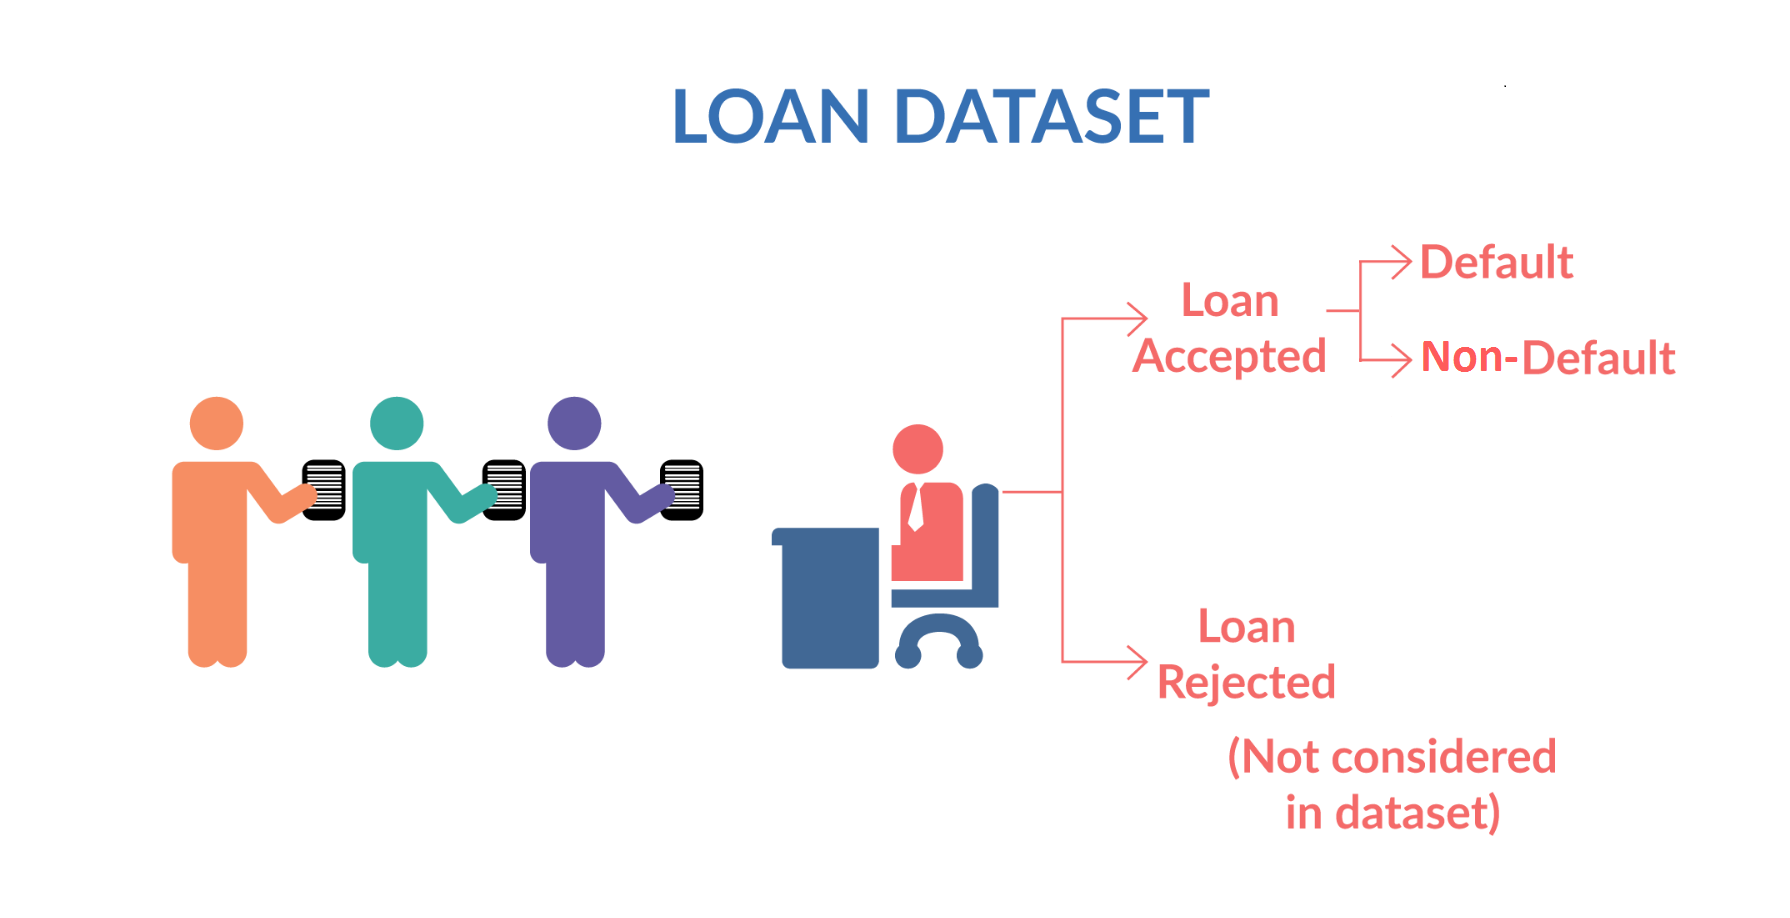

# Business Objectives


This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# **DATA UNDERSTANDING**

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the csv dataset
loan = pd.read_csv(r"C:\Users\Yoga\OneDrive\Documents\lending club\loan.csv")

In [3]:
#Check the first five rows of the dataset to get basic understanding of the data
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
#Check the number of rows and columns in the dataset
loan.shape

(39717, 111)

In [5]:
#Check the datatypes of the columns
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
#Count the number of null values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# DATA CLEANING

In [7]:
#Drop columns having all values null
loan1 = loan.loc[:, loan.notnull().any(axis = 0)]

In [8]:
#Check the shape of the dataset after removing columns having all Null values
loan1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
#Find the percentage of missing values and drop columns having null values more than 75%
per_missing = round((loan1.isnull().sum()/len(loan1))*100)
print(per_missing)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [10]:
#Drop columns where 75% of the data is missing
loan1 = loan1.dropna(thresh = len(loan1)*0.75,axis = 1)

In [11]:
#Check the rows and columns after dropping the columns
loan1.shape

(39717, 53)

In [12]:
#The dataframe after removing the null values
loan1

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   
1       60 months   15.27%        59.83     C        C4  ...          119.66   
2       36 months   15.96%        84.33     C        C5  ...          649.91   
3       36 months   13.49%       339.31     C        C1  ...          357.48   
4       60 months   12.69%        67.79     B        B5  ...           67.79   
...           ...      ...          ...   ...       ...  ...             ...   
39712   36 months    8.07%        78.42     A        A4  ...           80.90   
39713   36 months   10.28%       275.38     C        C1  ...          281.94   
39714   36 months    8.07%       156.84     A        A4  ...            0.00   
39715   36 months    7.43%       155.38     A        A2  ...            0.00   
39716   36 months   13.75%       255.43     E        E2  ...          256.59   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0                 May-16                        0.0            1   
1                 Sep-13                        0.0            1   
2                 May-16                        0.0            1   
3                 Apr-16                        0.0            1   
4                 May-16                        0.0            1   
...                  ...                        ...          ...   
39712             Jun-10                        NaN            1   
39713             Jul-10                        NaN            1   
39714             Jun-07                        NaN            1   
39715             Jun-07                        NaN            1   
39716             Jun-10                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                      0.0           0   
1           INDIVIDUAL              0                      0.0           0   
2           INDIVIDUAL              0                      0.0           0   
3           INDIVIDUAL              0                      0.0           0   
4           INDIVIDUAL              0                      0.0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN 

Analyzing columns having only 1 unique value as it does not add value to the analysis

In [13]:
#Check how many unique values are present in each column and sort them in ascending order
loan1.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [14]:
#Drop columns having only 1 unique value as it may not aid much to our analysis
loan2 = loan1.loc[:,loan1.nunique().sort_values() != 1]

In [15]:
#Check the number of rows and columns after removing the columns having unique value as 1
loan2.shape

(39717, 44)

In [16]:
#Check if anymore null values are present in the dataframe and the datatypes of each column
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Drop columns which do not help much with the analysis - Assuming that customer behaviour variables do not help much with the analysis as it may not be available when the applicant applies for the loan

In [17]:
#Check the columns that are in the dataset
loan2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
#Dropping columns which does not help much with the analysis
ln = loan2.drop(['id','member_id','emp_title','url','zip_code','delinq_2yrs', 'earliest_cr_line','inq_last_6mths',
                 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','title',
                 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries',
                 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies'],axis=1)

In [19]:
#Again check if there are any null values in the dataset and check the datatypes
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  addr_state           39717 non-null 

Imputing and Converting datatypes

In [20]:
#Impute the missing values in each column and convert to the appropriate datatypes
ln.term = ln.term.apply(lambda x:str(x).replace("months","")).astype('int64')
ln.int_rate = ln.int_rate.apply(lambda x:str(x).replace("%","")).astype('float64')
ln.grade = ln.grade.astype('string')
ln.sub_grade = ln.sub_grade.astype('string')
ln.home_ownership = ln.home_ownership.fillna(ln.home_ownership.mode()[0]).astype('string')
ln.verification_status = ln.verification_status.astype('string') 
ln.loan_status = ln.loan_status.astype('string')
ln.purpose = ln.purpose.astype('string')
ln.addr_state = ln.addr_state.astype('string')

In [21]:
#Impute the missing values in each column and convert to the appropriate datatypes
ln.emp_length = ln.emp_length.fillna(ln.emp_length.mode()[0])
ln.emp_length = ln.emp_length.apply(lambda x : str(x).replace('< 1','0').replace('years','').replace('year','').replace('+',''))
ln.emp_length = ln.emp_length.astype('int64')

In [22]:
#Check the datatype of the columns after imputing and converting datatypes
ln.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                     int64
int_rate               float64
installment            float64
grade                   string
sub_grade               string
emp_length               int64
home_ownership          string
annual_inc             float64
verification_status     string
issue_d                 object
loan_status             string
purpose                 string
addr_state              string
dti                    float64
dtype: object

Derived metrics

In [23]:
#Extracting year and month from the issues date
ln.issue_d = pd.to_datetime(ln.issue_d,format = '%b-%y')
ln['issued_year'] = ln.issue_d.dt.year
ln['issued_month'] = ln.issue_d.dt.month

In [24]:
#Check the dataframe after type conversions
ln

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
4           3000         3000           3000.0    60     12.69        67.79   
...          ...          ...              ...   ...       ...          ...   
39712       2500         2500           1075.0    36      8.07        78.42   
39713       8500         8500            875.0    36     10.28       275.38   
39714       5000         5000           1325.0    36      8.07       156.84   
39715       5000         5000            650.0    36      7.43       155.38   
39716       7500         7500            800.0    36     13.75       255.43   

      grade sub_grade  emp_length home_ownership  annual_inc  \
0         B        B2          10           RENT     24000.0   
1         C        C4           0           RENT     30000.0   
2         C        C5          10           RENT     12252.0   
3         C        C1          10           RENT     49200.0   
4         B        B5           1           RENT     80000.0   
...     ...       ...         ...            ...         ...   
39712     A        A4           4       MORTGAGE    110000.0   
39713     C        C1           3           RENT     18000.0   
39714     A        A4           0       MORTGAGE    100000.0   
39715     A        A2           0       MORTGAGE    200000.0   
39716     E        E2           0            OWN     22000.0   

      verification_status    issue_d  loan_status             purpose  \
0                Verified 2011-12-01   Fully Paid         credit_card   
1         Source Verified 2011-12-01  Charged Off                 car   
2            Not Verified 2011-12-01   Fully Paid      small_business   
3         Source Verified 2011-12-01   Fully Paid               other   
4         Source Verified 2011-12-01      Current               other   
...                   ...        ...          ...                 ...   
39712        Not Verified 2007-07-01   Fully Paid    home_improvement   
39713        Not Verified 2007-07-01   Fully Paid         credit_card   
39714        Not Verified 2007-07-01   Fully Paid  debt_consolidation   
39715        Not Verified 2007-07-01   Fully Paid               other   
39716        Not Verified 2007-06-01   Fully Paid  debt_consolidation   

      addr_state    dti  issued_year  issued_month  
0             AZ  27.65         2011            12  
1             GA   1.00         2011            12  
2             IL   8.72         2011            12  
3             CA  20.00         2011            12  
4             OR  17.94         2011            12  
...          ...    ...          ...           ...  
39712         CO  11.33         2007             7  
39713         NC   6.40         2007             7  
39714         MA   2.30         2007             7  
39715         MD   3.72         2007             7  
39716         MA  14.29         2007             6  

[39717 rows x 19 columns]

### Now all columns have been converted to the respective datatypes, let's dive into check our target variable

In [25]:
#Check the columns in the dataframe
ln.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'issued_year', 'issued_month'],
      dtype='object')

In [26]:
#Dropping the Current loan status as this doesnt give any inference when the loan is still in progress
floan = ln[ln['loan_status'] != 'Current'].reset_index(drop = True)

In [27]:
#Check the dataframe and check if index is reset after the rows are dropped
#So this is our final dataframe after Data Cleaning
floan

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
4           5000         5000           5000.0    36      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
38572       2500         2500           1075.0    36      8.07        78.42   
38573       8500         8500            875.0    36     10.28       275.38   
38574       5000         5000           1325.0    36      8.07       156.84   
38575       5000         5000            650.0    36      7.43       155.38   
38576       7500         7500            800.0    36     13.75       255.43   

      grade sub_grade  emp_length home_ownership  annual_inc  \
0         B        B2          10           RENT     24000.0   
1         C        C4           0           RENT     30000.0   
2         C        C5          10           RENT     12252.0   
3         C        C1          10           RENT     49200.0   
4         A        A4           3           RENT     36000.0   
...     ...       ...         ...            ...         ...   
38572     A        A4           4       MORTGAGE    110000.0   
38573     C        C1           3           RENT     18000.0   
38574     A        A4           0       MORTGAGE    100000.0   
38575     A        A2           0       MORTGAGE    200000.0   
38576     E        E2           0            OWN     22000.0   

      verification_status    issue_d  loan_status             purpose  \
0                Verified 2011-12-01   Fully Paid         credit_card   
1         Source Verified 2011-12-01  Charged Off                 car   
2            Not Verified 2011-12-01   Fully Paid      small_business   
3         Source Verified 2011-12-01   Fully Paid               other   
4         Source Verified 2011-12-01   Fully Paid             wedding   
...                   ...        ...          ...                 ...   
38572        Not Verified 2007-07-01   Fully Paid    home_improvement   
38573        Not Verified 2007-07-01   Fully Paid         credit_card   
38574        Not Verified 2007-07-01   Fully Paid  debt_consolidation   
38575        Not Verified 2007-07-01   Fully Paid               other   
38576        Not Verified 2007-06-01   Fully Paid  debt_consolidation   

      addr_state    dti  issued_year  issued_month  
0             AZ  27.65         2011            12  
1             GA   1.00         2011            12  
2             IL   8.72         2011            12  
3             CA  20.00         2011            12  
4             AZ  11.20         2011            12  
...          ...    ...          ...           ...  
38572         CO  11.33         2007             7  
38573         NC   6.40         2007             7  
38574         MA   2.30         2007             7  
38575         MD   3.72         2007             7  
38576         MA  14.29         2007             6  

[38577 rows x 19 columns]

# Now that we have prepared the data after cleaning, let's progress to the main agenda - "Data Analysis"

# __UNIVARIATE ANALYSIS__

##### **Loan amount analysis**

[Text(0.5, 0, 'NO OF APPLICANTS'),
 Text(0, 0.5, 'LOAN AMOUNT'),
 Text(0.5, 1.0, 'LOAN AMOUNT ANALYSIS')]

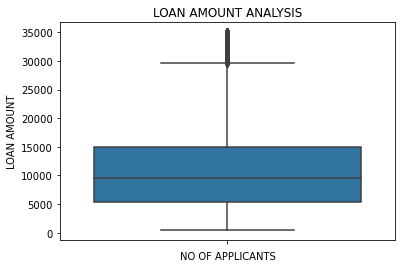

In [28]:
#Plot a boxplot to check the loan amount applied by the applicants
lamnt = sns.boxplot(data = floan, y = 'loan_amnt')
lamnt.set(xlabel ="NO OF APPLICANTS", ylabel = "LOAN AMOUNT", title ='LOAN AMOUNT ANALYSIS')

_**Inference : Most of the loans applied are below 30000 with average number of consumers applying loans for 10000**_

##### **Loan Status analysis**

Text(0, 0.5, '')

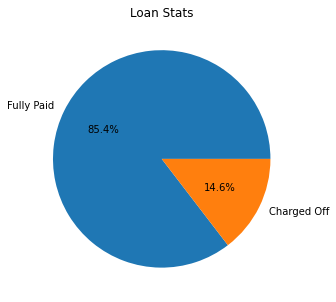

In [29]:
#Check the loan status column to arrive at the tradeoff between Charged off and Fully Paid
floan.loan_status.value_counts().plot(kind = 'pie',figsize=(5,5),autopct = '%1.1f%%')
plt.title("Loan Stats")
plt.ylabel('')


_**Inference : More than 85% of the loans are fully paid**_

<AxesSubplot:title={'center':'HOME OWNERSHIP STATUS'}, xlabel='Home Ownership of the applicants', ylabel='No of applicants'>

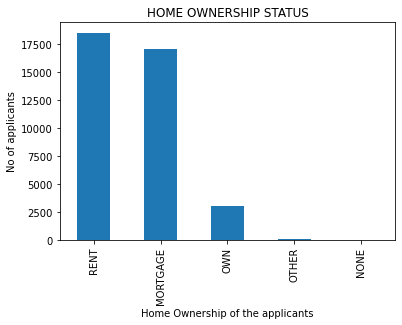

In [30]:
# Plot a bar graph to understand home ownership
floan.home_ownership.value_counts().plot.bar(title = "HOME OWNERSHIP STATUS",xlabel = "Home Ownership of the applicants",ylabel = 'No of applicants')


_**INFERENCE: Majority of the applicants lived in Rented houses and houses in Mortgage**_

56.302978458667084

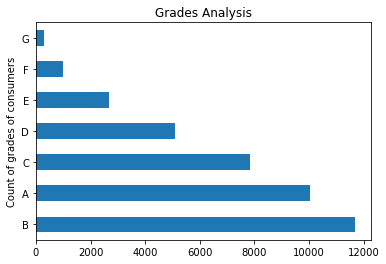

In [31]:
#Understanding how grades are distrubuted across the data
floan.grade.value_counts().plot.barh(title = "Grades Analysis",xlabel = "Count of grades of consumers",ylabel = "Grades")
(floan.grade.value_counts()[0]+floan.grade.value_counts()[1])/len(floan.grade)*100

_**Inference :56% of the loans are of Grade A and Grade B,hereby, most of the loans are top graded loans**_

<AxesSubplot:title={'center':'Experience of the applicants'}, xlabel='No. of years of experience', ylabel='No of applicants'>

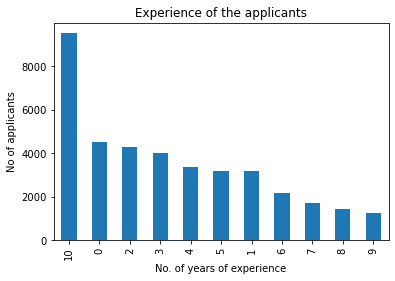

In [32]:
#Plotting a bar graph to understand the work experience of the applicants
exp = floan.emp_length.value_counts()
exp.sort_values(ascending = False).plot.bar(title = "Experience of the applicants",xlabel = "No. of years of experience",ylabel= "No of applicants")


_**Inference : Majority of the applicants who have requested for loans have 10+ years of experience**_

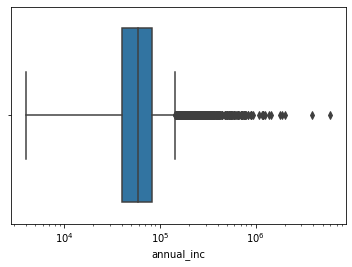

In [33]:
#Plot a box plot to understand the income of the applicants
sns.boxplot(data = floan,x = 'annual_inc',width = 0.8)
plt.xscale('log') # since the values are large scaling them to make it small

_**Inference:There are only 2 applicants with annual income more than 3 lakhs**_

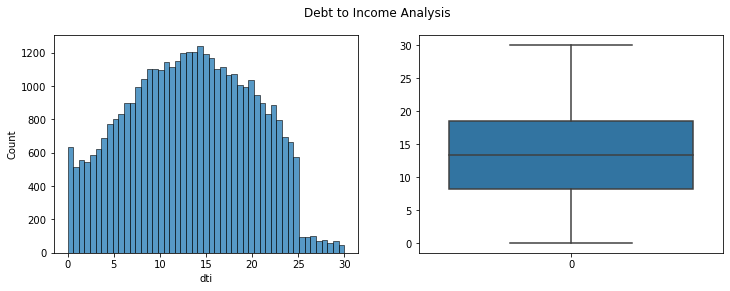

In [34]:
#Plot two graphs to understand the frequency of data of DTI
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=floan["dti"])
plt.subplot(1,2,2)
sns.boxplot(data=floan["dti"])
plt.suptitle('Debt to Income Analysis')
plt.show()

_**Inference : The mean value of DTI lies between 10 to 15 and all values lie below 30**_

#### Analysis for derived metrics : Year and month

[Text(0.5, 0, 'issued month'),
 Text(0, 0.5, 'value'),
 Text(0.5, 1.0, 'Issued month Analysis')]

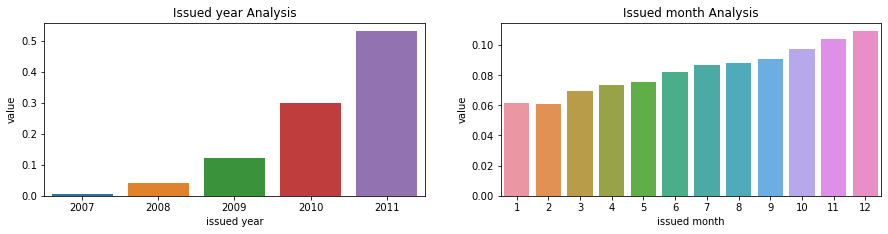

In [35]:
# Plot a subplot to understand the loan issued year and month
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
iy = sns.barplot(x='index', y='issued_year', data=floan['issued_year'].value_counts(normalize=True).reset_index())
iy.set(xlabel= 'issued year',ylabel = 'value',title = 'Issued year Analysis')

plt.subplot(2,2,2)
im = sns.barplot(x='index', y='issued_month', data=floan['issued_month'].value_counts(normalize=True).reset_index())
im.set(xlabel = 'issued month',ylabel = 'value',title = 'Issued month Analysis')

_**Inferences: The loans requested by the consumers increases every year and is the highest in 2011.Most of the loans were requested in October,November and Decemeber**_
             

##### EMPLOYEE LENGTH Vs GRADE ANALYSIS

[Text(0.5, 0, 'Grade'), Text(0, 0.5, 'No of applicants')]

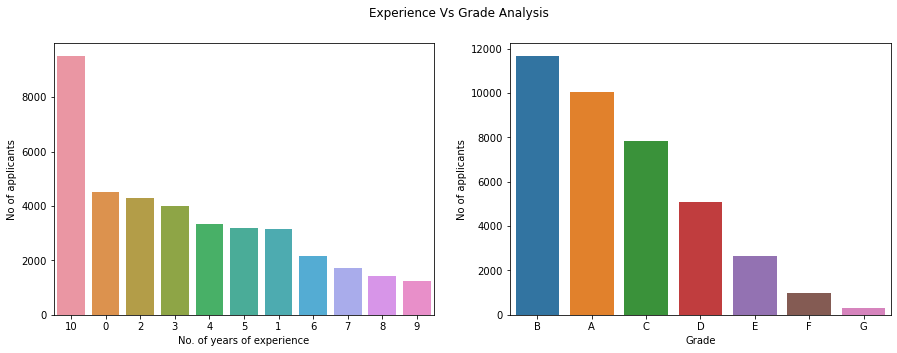

In [36]:
# Plot a subplot to understand how experience and grades are distributed
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
exp = sns.countplot(data = floan,x = 'emp_length',order = floan.emp_length.value_counts().index)
exp.set(xlabel= 'No. of years of experience',ylabel ='No of applicants')
plt.suptitle("Experience Vs Grade Analysis")


plt.subplot(1,2,2)
grd = sns.countplot(data = floan,x = 'grade',order = floan.grade.value_counts().index)
grd.set(xlabel= 'Grade',ylabel ='No of applicants')

__**Inference : People having more than 10 years of experience have applied for the highest grades loans such as B,A,C**__

# SEGMENTED UNIVARIATE ANALYSIS

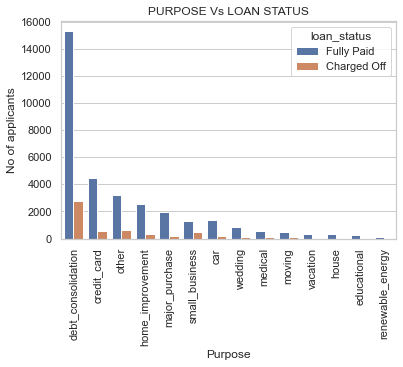

In [37]:
#Plot a count plot to understand for what purposes the applicants have applied for loan
sns.set(style='whitegrid')
pp = sns.countplot(x='purpose', hue="loan_status",data=floan,order = floan.purpose.value_counts().index)
pp.set(title = "PURPOSE Vs LOAN STATUS",xlabel = 'Purpose',ylabel = 'No of applicants')
plt.xticks(rotation=90)
plt.show()


_**Inference: The loans taken for Debt consolidation is comparitively high than the loans taken for other purposes and have been fully paid**_

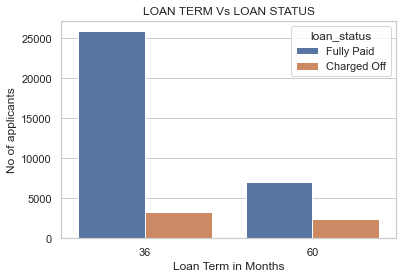

In [38]:
#Plot a count plot to understand the term the loan is approved for
tr = sns.countplot( x="term", hue='loan_status', data=floan)
tr.set(xlabel='Loan Term in Months',ylabel = 'No of applicants',title = 'LOAN TERM Vs LOAN STATUS')
plt.show()

_**Inference:The loans by consumers for a short duration is likely to be charged off**_


# BIVARIATE ANALYSIS

[Text(0.5, 0, 'LOAN STATUS'), Text(0, 0.5, 'INTEREST RATE')]

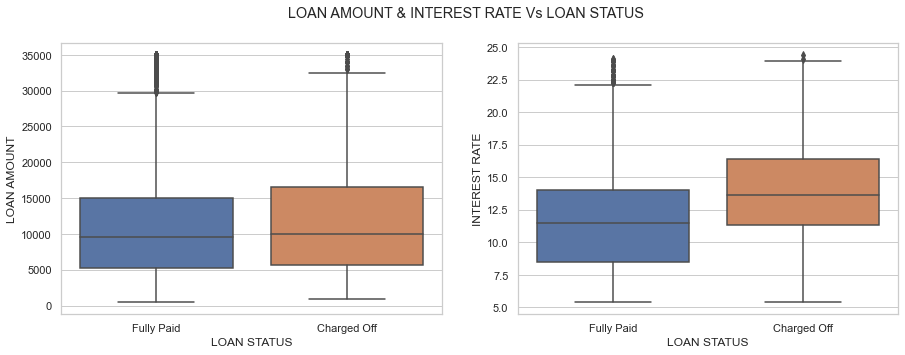

In [39]:
#Plot a subplot to understand the relation  between Loan amount & Interest rate Vs Loan status
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
lt = sns.boxplot(data = floan,x = 'loan_status',y = 'loan_amnt')
plt.suptitle("LOAN AMOUNT & INTEREST RATE Vs LOAN STATUS")
lt.set(xlabel = "LOAN STATUS",ylabel= "LOAN AMOUNT")

plt.subplot(1,2,2)
ir = sns.boxplot(data = floan,x = 'loan_status',y = 'int_rate')
ir.set(xlabel = "LOAN STATUS",ylabel= "INTEREST RATE")

_**INFERENCE : Loan amount when compared to the Loan status, the mean between Fully Paid and Charged Off is negligible**_

_**whereas, the mean value of the Charged off consumers is higher than that of the Fully Paid consumers**_

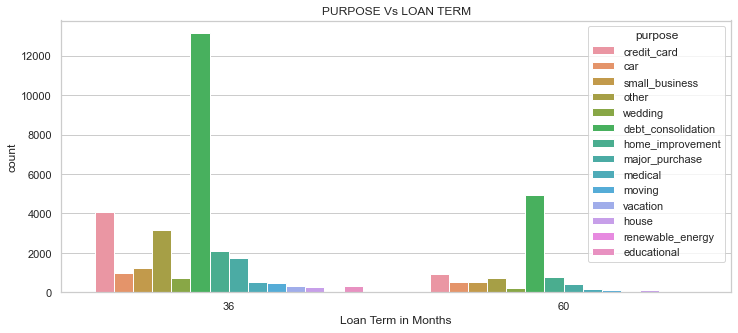

In [40]:
#Plot a graph to understand how Loan terms affects the loan status
plt.figure(figsize=(12,5))
tp = sns.countplot( x="term", hue='purpose', data=floan)
tp.set(xlabel='Loan Term in Months',title='PURPOSE Vs LOAN TERM')
plt.show()

_**Inference: Applicants taken Loan for shorter term are likely to be defaulters**_

[Text(0.5, 0, 'LOAN STATUS'), Text(0, 0.5, 'ANNUAL INCOME')]

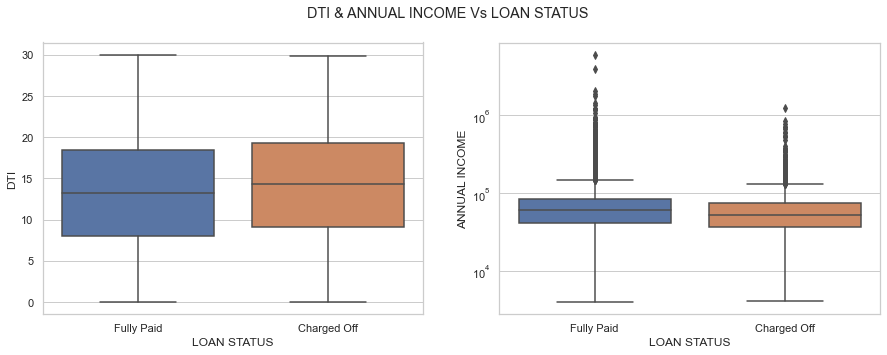

In [41]:
#Plot a subplot to understand DTI Vs LOAN AMOUNT VS LOAN STATUS
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
dtib = sns.boxplot(data = floan,x = 'loan_status',y = 'dti')
plt.suptitle("DTI & ANNUAL INCOME Vs LOAN STATUS")
dtib.set(xlabel = "LOAN STATUS",ylabel = 'DTI')

plt.subplot(1,2,2)
ai = sns.boxplot(data = floan,x = 'loan_status',y = 'annual_inc')
plt.yscale('log')
ai.set(xlabel= "LOAN STATUS",ylabel = "ANNUAL INCOME")

_**INFERENCE: DTI Vs Loan status shows that the mean of DTI of Charged off loans is slightly higher than the Fully paid loans. Also The annual income of Fully paid consumers are higher than the Charged off consumers**_

In [42]:
#Create a dataframe with the numerical values to see the correlation between the variables
cont_loan = floan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','annual_inc','dti' ]]

In [43]:
#Create a correlation table with the numerical values
cont_loan.corr()

loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt         1.000000     0.981790         0.937922     0.932260   
funded_amnt       0.981790     1.000000         0.956172     0.958035   
funded_amnt_inv   0.937922     0.956172         1.000000     0.905464   
installment       0.932260     0.958035         0.905464     1.000000   
annual_inc        0.268999     0.264798         0.251981     0.267842   
dti               0.062436     0.062194         0.070663     0.052038   

                 annual_inc       dti  
loan_amnt          0.268999  0.062436  
funded_amnt        0.264798  0.062194  
funded_amnt_inv    0.251981  0.070663  
installment        0.267842  0.052038  
annual_inc         1.000000 -0.121530  
dti               -0.121530  1.000000

<AxesSubplot:>

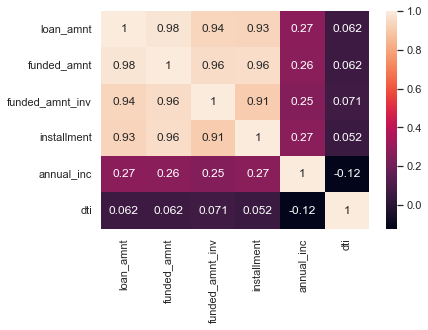

In [44]:
#Create a heatmap with the correlated variables
hp = cont_loan.corr()
sns.heatmap(hp, annot=True)

_**INFERENCE : Almost 90% of the amount applied by the applicant has been funded by the investor, also, majority of the loan amounts have been approved by the approver**_

[Text(0.5, 0, 'VERIFICATION STATUS'),
 Text(0, 0.5, 'NO OF APPLICANTS'),
 Text(0.5, 1.0, 'VERIFICATION Vs LOAN STATUS')]

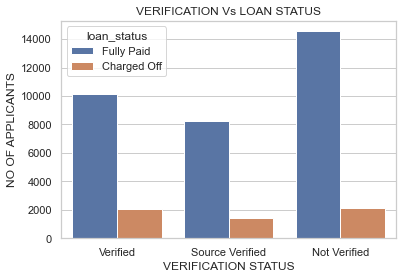

In [45]:
#CHeck the loan status with Verification status
vf = sns.countplot( x="verification_status", hue='loan_status', data=floan)
vf.set(xlabel = "VERIFICATION STATUS",ylabel="NO OF APPLICANTS",title="VERIFICATION Vs LOAN STATUS")

_**INFERENCE: Its only a slight difference in Chargeoff between Verified and Not Verified**_

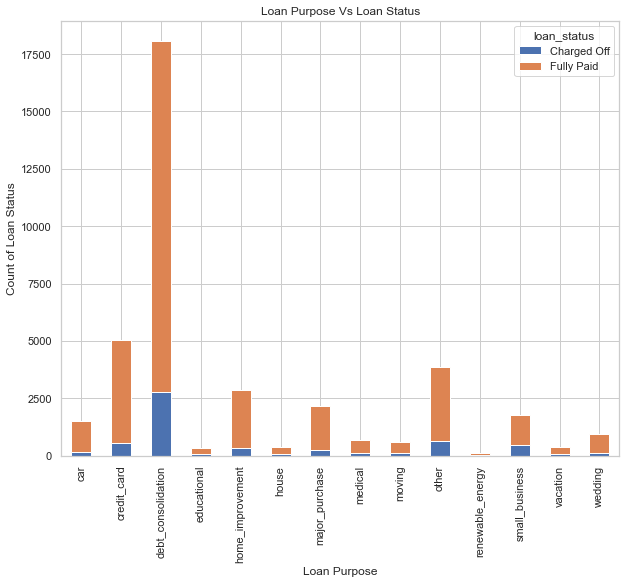

In [46]:
#Understand how loan purpose affects loan status
floan_pv = pd.pivot_table(data=floan, index=floan["purpose"], columns=floan["loan_status"],values="loan_status", aggfunc='count')
floan_pv.plot(kind="bar", stacked="True", figsize=[10,8],ylabel="Count of Loan Status",xlabel = "Loan Purpose",title ="Loan Purpose Vs Loan Status")
plt.show()


_**INFERENCE: More applicants have defaulted for getting loan for debt consilation**_

<AxesSubplot:title={'center':'Grade Vs Loan Status'}, xlabel='Grade', ylabel='Count of Loan Status'>

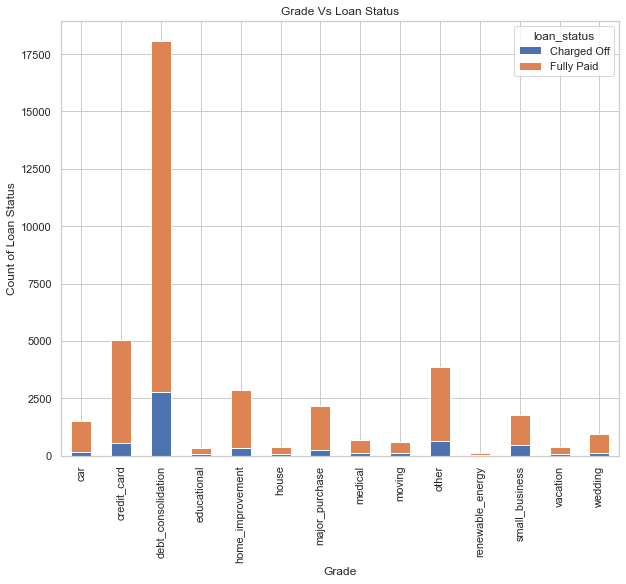

In [47]:
#Understand how grade affects loan status
floan_pv1 = pd.pivot_table(data=floan, index=floan["grade"], columns=floan["loan_status"],values="loan_status", aggfunc='count')
floan_pv.plot(kind="bar", stacked="True", figsize=[10,8],ylabel="Count of Loan Status",xlabel = "Grade",title ="Grade Vs Loan Status")


_**INFERENCE: Majority of the applicants have defaulted for B grade loans**_

[Text(0, 0.5, 'Count of Loan Status'),
 Text(0.5, 0, 'No of years experience'),
 Text(0.5, 1.0, 'Experience Vs Loan Status')]

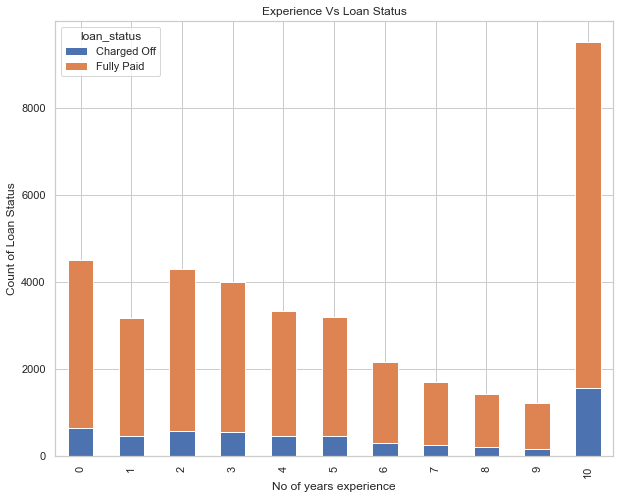

In [48]:
#Plot a graph to understand how experience affects loan payments
floan_pv = pd.pivot_table(data=floan, index=floan["emp_length"], columns=floan["loan_status"],values="loan_status", aggfunc='count')
lpe = floan_pv.plot(kind="bar", stacked="True", figsize=[10,8])
lpe.set(ylabel = "Count of Loan Status",xlabel = "No of years experience",title = "Experience Vs Loan Status")


_**INFERENCE: Applicants with work experience of 10+ years are likely to default**_

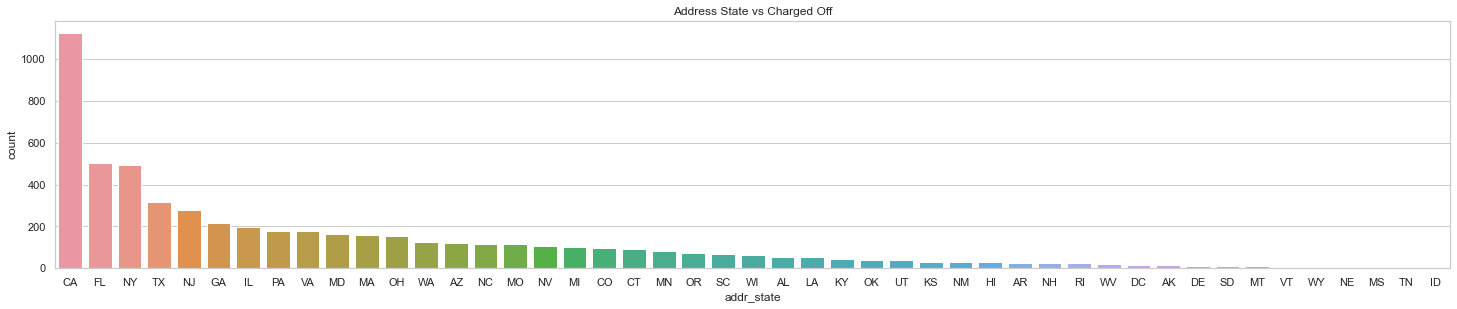

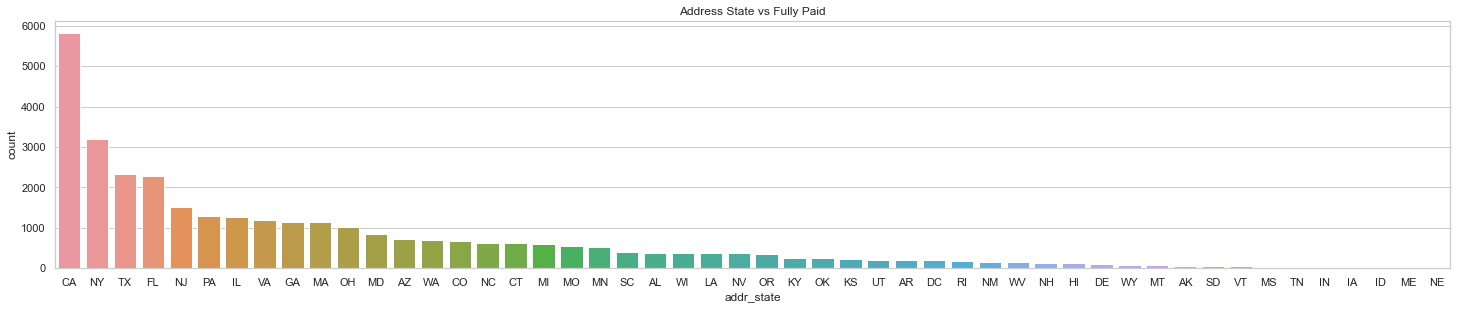

In [95]:
#Understand which states affect Loan status
charged_off_df = floan[floan.loan_status.values == 'Charged Off']
plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = floan[floan.loan_status.values == 'Fully Paid']
plt.figure(figsize=(25,10))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

_**INFERENCE: The applicants from CA,FL and NY States are most likely to default**_

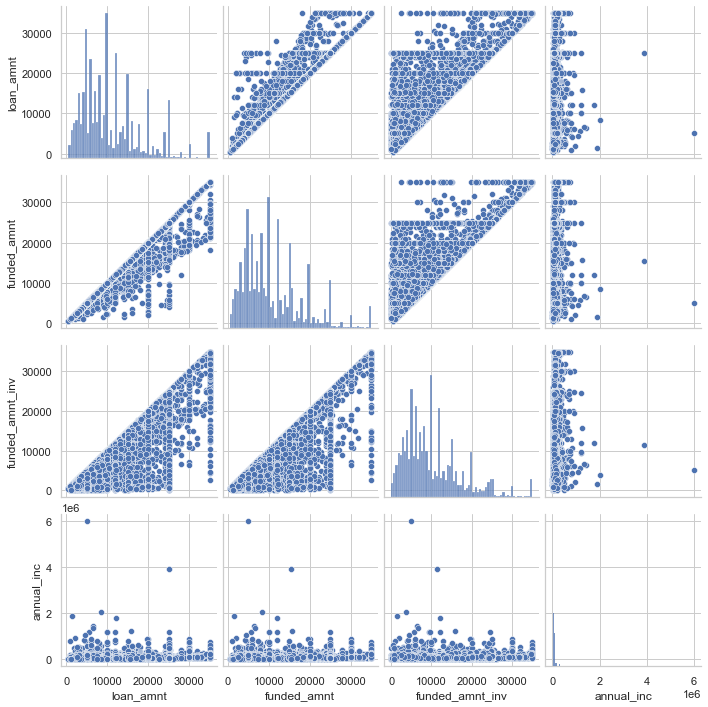

In [50]:
#Plot a pairplot between the numerical values
sns.pairplot(floan[['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc']])
plt.show()

In [51]:
#Import plotly library and plot the loan issued year and the loan status
import plotly.express as px
result = floan.groupby(['issued_year'])[['loan_status']].count()
result.reset_index(inplace = True)
result

issued_year  loan_status
0         2007          251
1         2008         1562
2         2009         4716
3         2010        11532
4         2011        20516

In [52]:
fig = px.line(result, x = 'issued_year',y = 'loan_status',title = "Count of loans granted over the years")
fig.show()

_**INFERENCE: No of applicants have been increasing year on year. The high number of loan defaults in 2011**_

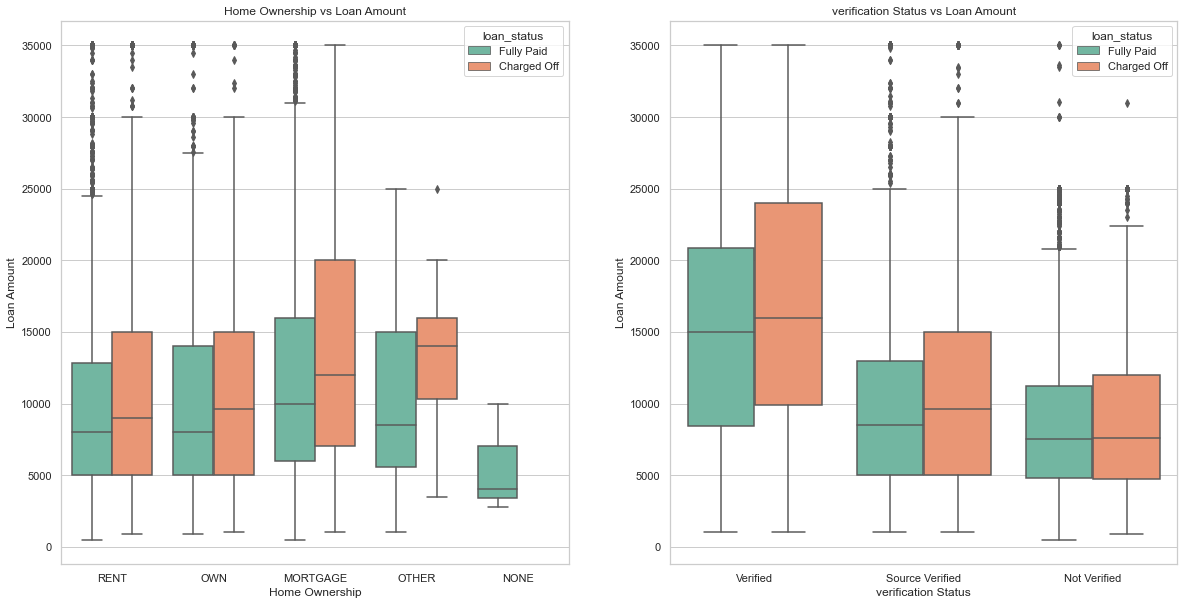

In [53]:
# Plot a graph to understand the tradeoff between Home Ownership and Verification Vs Loan Status
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
a = sns.boxplot(x='home_ownership', y='loan_amnt', data=floan, hue="loan_status",  palette="Set2")
a.set(ylabel="Loan Amount",xlabel="Home Ownership",title='Home Ownership vs Loan Amount')

plt.subplot(1,2,2)
b = sns.boxplot(x='verification_status', y='loan_amnt', order = loan.verification_status.unique().sort(), data=floan, hue="loan_status",  palette="Set2")
b.set(title='verification Status vs Loan Amount',ylabel="Loan Amount",xlabel="verification Status")
plt.show()

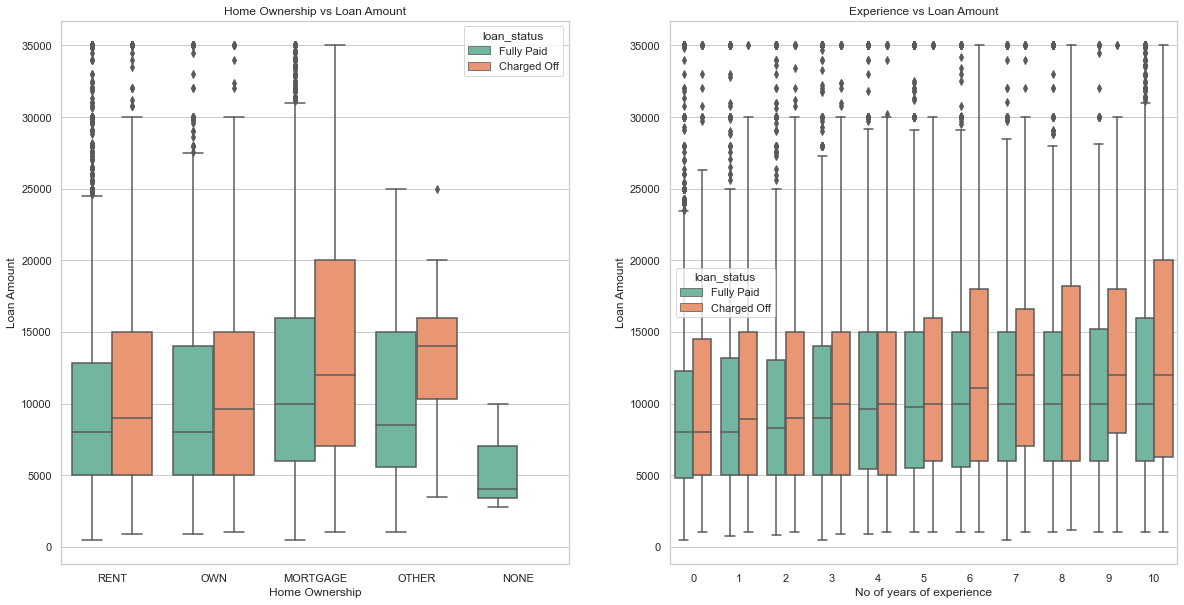

In [54]:
# Plot a graph to understand the tradeoff between Home Ownership and Experience Vs Loan Status
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
c = sns.boxplot(x='home_ownership', y='loan_amnt', data=floan, hue="loan_status",  palette="Set2")
c.set(ylabel="Loan Amount",xlabel="Home Ownership",title='Home Ownership vs Loan Amount')

plt.subplot(1,2,2)
d = sns.boxplot(x='emp_length', y='loan_amnt', data=floan, hue="loan_status",  palette="Set2")
d.set(ylabel="Loan Amount",xlabel="No of years of experience",title='Experience vs Loan Amount')
plt.show()

_**INFERENCE: Applicants whose home is in mortgage and having work experience of more than 10 yrs are likely to default**_

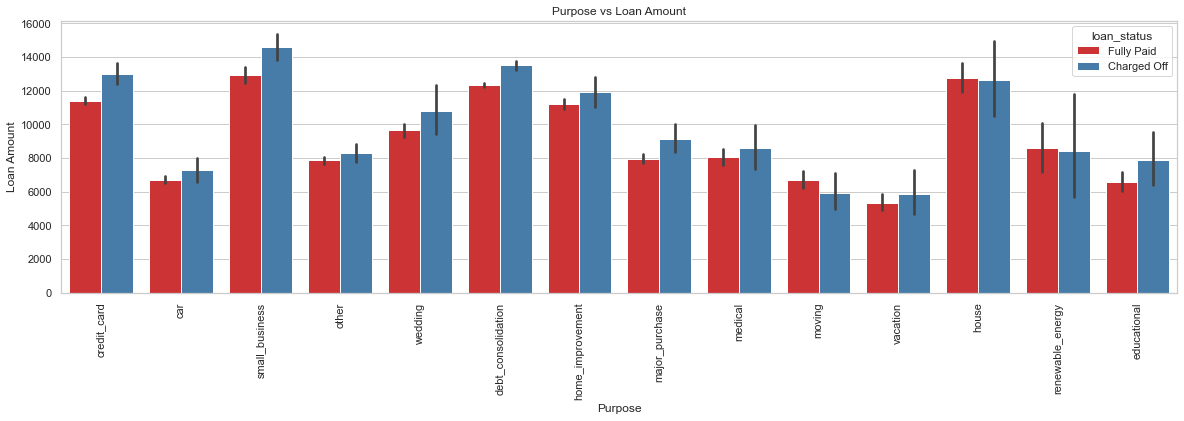

In [55]:
#Plot a bar graph to understand the tradeoff between loan purpose and Loan amount to infer how it affects the loan status
plt.figure(figsize=(20,5))
pp = sns.barplot(x='purpose', y='loan_amnt', data=floan, hue="loan_status",  palette="Set1")
pp.set(title='Purpose vs Loan Amount',ylabel="Loan Amount",xlabel="Purpose")
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.show()

_**INFERENCE : Loans taken for small businesses,credit card,debt consolidation with loan amount greater than 12000 are likely to default**_

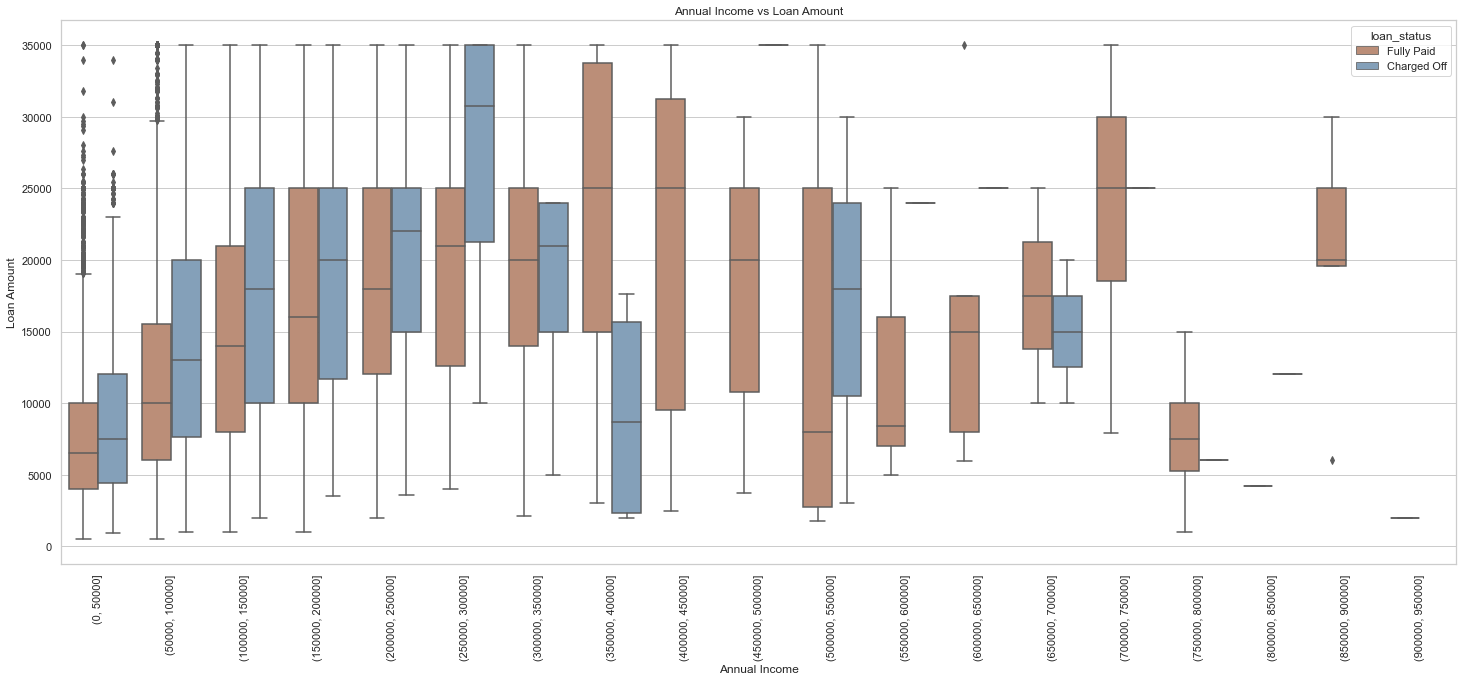

In [56]:
#Plot a box plot to understand the tradeoff between Income group and loan amount and how it affects the loan status
plt.figure(figsize=(25,10))
floan['Income_group'] = pd.cut(floan['annual_inc'], bins=range(0, 1000000, 50000))
ig = sns.boxplot(x=floan['Income_group'], y='loan_amnt', data=floan, hue="loan_status",  palette="twilight_shifted_r")
ig.set(title = 'Annual Income vs Loan Amount',ylabel = "Loan Amount",xlabel = 'Annual Income')
plt.xticks(rotation=90)
plt.show()

_**INFERENCE: The Income group 250000-300000 who are applying for a loan of above 20000 are likely to default**_
    

_**The Income group 350000-400000 applying for a loan below 15000 are less likely to default**_

In [57]:
floan['int_rate_groups'] = pd.cut(floan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
floan['annual_inc_groups'] = pd.cut(floan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<AxesSubplot:xlabel='int_rate_groups', ylabel='loan_amnt'>

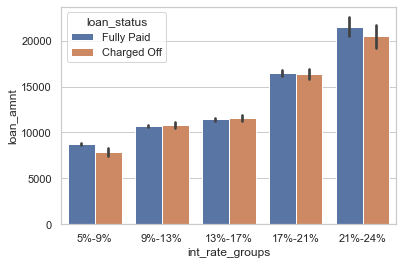

In [58]:
sns.barplot(x = "int_rate_groups", y = "loan_amnt", hue = 'loan_status', data = floan)

**_INFERENCE: The applicants who have taken loans with higher interest rates are likely to default. The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.This can be a pretty strong driving factor for loan defaulting._**

<AxesSubplot:xlabel='loan_status'>

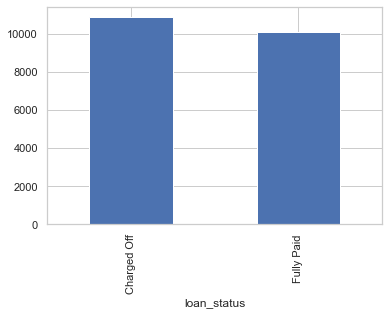

In [65]:
floan.groupby(['loan_status'])['funded_amnt_inv'].mean().plot.bar()

**_INFERENCE: The applicants who have applied for higher loan amounts are likely to be defaulters_** 

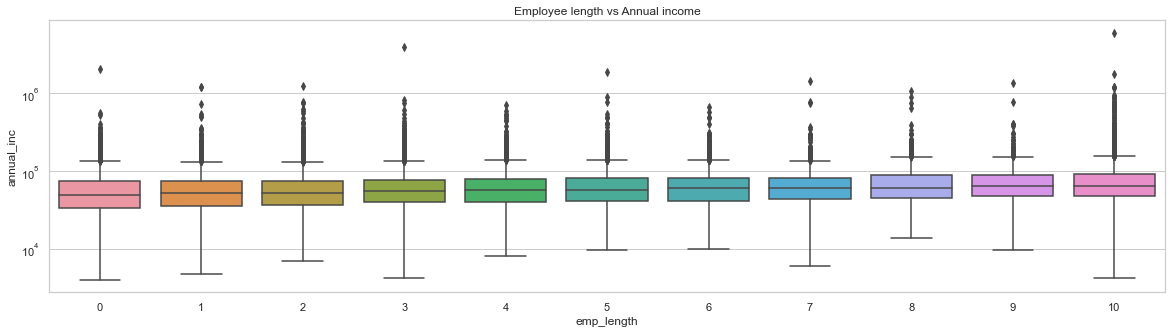

In [74]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=floan.annual_inc, data=floan)
plt.title('Employee length vs Annual income')
plt.yscale('log')

**_INFERENCE: Applicants with 10 yrs experience have high incomes_**

Text(0.5, 1.0, 'loan_status vs dti')

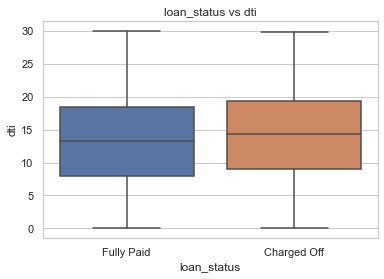

In [75]:
sns.boxplot(x='loan_status', y=floan.dti, data=floan)
plt.title('loan_status vs dti')

**_INFERENCE: Applicants with high DTI has bit more probability to default_**

Text(0.5, 1.0, 'purpose vs dti')

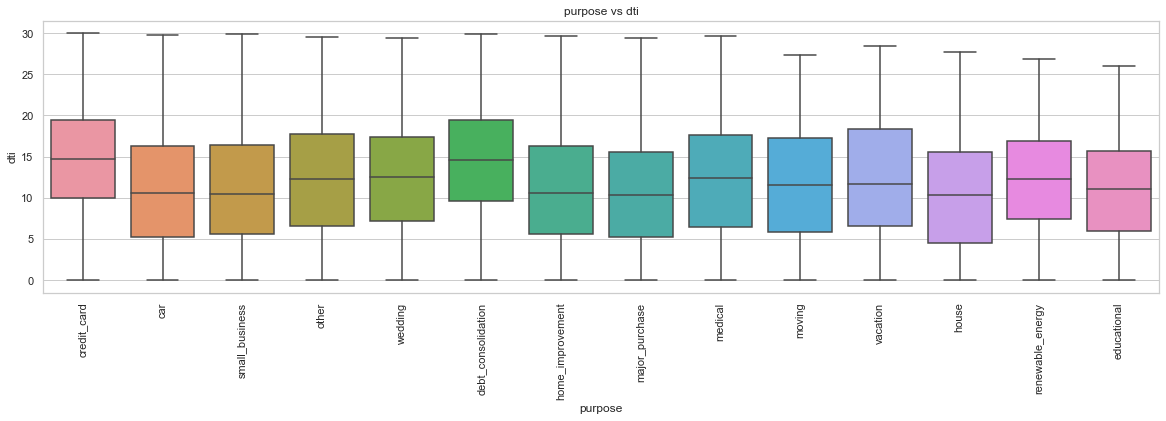

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=floan.dti, data=floan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

**_INFERENCE:People who took loan for credit card and debt consolidation purpose has more DTI than other purposes_**



In [86]:
grade_ord = sorted(floan.grade.unique())
grade_ord

['A', 'B', 'C', 'D', 'E', 'F', 'G']

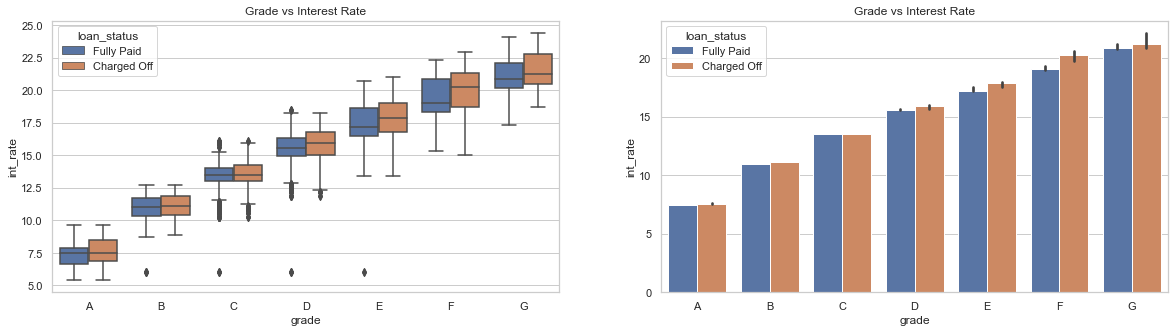

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=floan, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=floan, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

**_INFERENCE: As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan_**

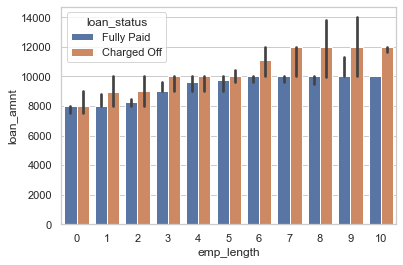

In [89]:
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=floan, estimator=np.median)
plt.show()


**_INFERENCE:Applicants with higher work experience and took more loan amounts are likely to be defaulted_**